# Literature Drug Response

In [1]:
import sys 
lab_path="/Users/andyzeng/Drive/Laptop/Dick_Lab/"
sys.path.append(lab_path+"AMLhierarchies/")
%load_ext rpy2.ipython

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline
import copy
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import anndata as ad
import scipy
import seaborn as sns
sc.set_figure_params(scanpy=True, dpi_save=200)
#from SAM import SAM
import Hierarchy_Tools as tk

In /Users/andyzeng/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/andyzeng/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/andyzeng/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/andyzeng/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/andyzeng/opt/anaconda3

## KPT330

In [71]:
KPT330_invitro = tk.load_fractions('Data/Fig5_Literature_DrugResponse/CIBERSORTx_Results_XPO1_KPT.csv')
KPT330_invitro.obs['treatment'] = [x[2] for x in KPT330_invitro.obs.index.str.split('_')]
KPT330_invitro.obs

,GMP-like-Absolute,LSPC-Cycle-Absolute,LSPC-Primed-Absolute,LSPC-Quiescent-Absolute,Mono-like-Absolute,ProMono-like-Absolute,cDC-like-Absolute,GMP-like-Relative,LSPC-Cycle-Relative,LSPC-Primed-Relative,LSPC-Quiescent-Relative,Mono-like-Relative,ProMono-like-Relative,cDC-like-Relative,treatment
Sample,,,,,,,,,,,,,,,
Primary_3_DMSO,0.207460,0.653741,0.241331,0.570070,0.0,0.296711,1.384987,0.061849,0.194896,0.071947,0.169952,0.0,0.088457,0.412899,DMSO
Primary_3_KPT,0.805329,0.133642,0.071236,1.111754,0.0,0.207170,1.339040,0.219545,0.036433,0.019420,0.303081,0.0,0.056478,0.365043,KPT
Primary_4_DMSO,1.791919,0.451518,0.000000,1.429811,0.0,0.738122,0.716680,0.349435,0.088049,0.000000,0.278822,0.0,0.143938,0.139757,DMSO
Primary_4_KPT,1.895104,0.024304,0.000000,1.821060,0.0,1.165745,0.701258,0.337960,0.004334,0.000000,0.324756,0.0,0.207891,0.125058,KPT
Primary_9_DMSO,0.000000,0.416127,0.111605,0.840648,0.0,0.473429,0.757572,0.000000,0.160087,0.042935,0.323403,0.0,0.182132,0.291443,DMSO
Primary_9_KPT,0.000000,0.000000,0.117008,1.302259,0.0,1.195639,1.241123,0.000000,0.000000,0.030344,0.337720,0.0,0.310070,0.321865,KPT


In [72]:
KPT330_invivo = tk.load_fractions('Data/Fig5_Literature_DrugResponse/CIBERSORTx_Results_KPT330_claire.csv')
KPT330_invivo.obs['treatment'] = [x[1] for x in KPT330_invivo.obs.index.str.split('_')]
KPT330_invivo.obs

,GMP-like-Absolute,LSPC-Cycle-Absolute,LSPC-Primed-Absolute,LSPC-Quiescent-Absolute,Mono-like-Absolute,ProMono-like-Absolute,cDC-like-Absolute,GMP-like-Relative,LSPC-Cycle-Relative,LSPC-Primed-Relative,LSPC-Quiescent-Relative,Mono-like-Relative,ProMono-like-Relative,cDC-like-Relative,treatment
Sample,,,,,,,,,,,,,,,
A37128_Veh_1,2.039603,10.153136,0.000000,6.580538,3.047341,0.000000,8.616702,0.067010,0.333575,0.000000,0.216200,0.100119,0.000000,0.283097,Veh
A37129_Veh_2,2.697493,8.784145,0.000000,7.343776,4.908170,0.000000,8.561707,0.083526,0.271995,0.000000,0.227395,0.151978,0.000000,0.265107,Veh
A37130_Veh_3,2.909900,8.426970,0.000000,6.919447,4.509839,0.000000,7.613547,0.095784,0.277388,0.000000,0.227765,0.148449,0.000000,0.250613,Veh
A37131_KPT_1,1.498320,2.520802,2.727196,6.038431,11.244888,0.176801,9.079810,0.045013,0.075731,0.081932,0.181409,0.337824,0.005312,0.272780,KPT
A37132_KPT_2,2.250166,3.328239,3.027366,7.294938,6.603925,0.000000,8.950134,0.071537,0.105810,0.096245,0.231918,0.209950,0.000000,0.284540,KPT
A37133_KPT_3,2.874451,3.356951,2.080156,5.936256,5.640789,0.387751,10.809539,0.092468,0.107990,0.066916,0.190963,0.181458,0.012474,0.347731,KPT


In [103]:
from statannot import add_stat_annotation
def box_category(data, category, score, xlab = None, ylab = None, order=["Low", "High"], boxpairlist=[("Low", "High")], textformat = "star", swarm=True, swarmsize=5):
    data = data.obs
    p1 = sns.boxplot(data = data, x = data[category], y = data[score], width=0.7, order=order, palette='Dark2')
    if swarm==True:
        p1 = sns.swarmplot(data = data, x = category, y = score, order=order, color="black", size = swarmsize)
    add_stat_annotation(p1, data=data, x= category, y= score, order=order, box_pairs=boxpairlist,
                        test='t-test_ind', text_format= textformat, loc='outside', verbose=0)
    if xlab != None:
        plt.xlabel(xlab)
    if ylab != None:
        plt.ylabel(ylab)
    sns.despine()


In [104]:
sns.set_style('white')

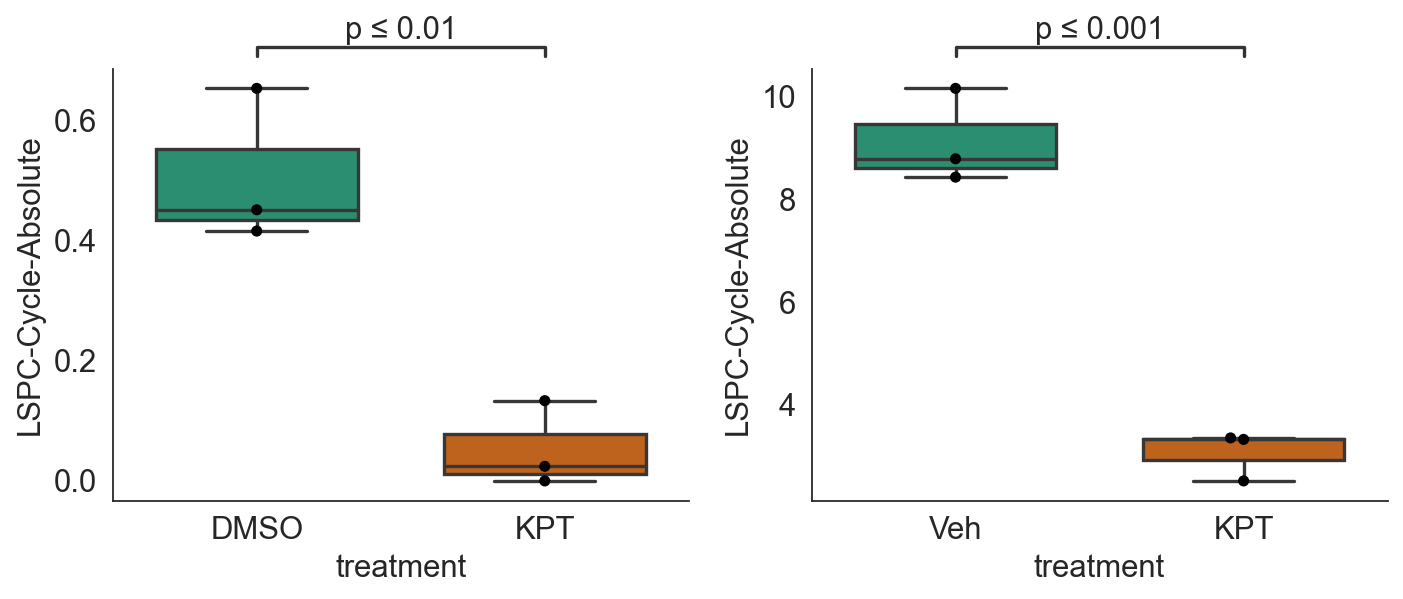

In [105]:
plt.figure(figsize=[9,4])
plt.subplot(1,2,1)
box_category(KPT330_invitro, 'treatment', 'LSPC-Cycle-Absolute', order=['DMSO', 'KPT'], boxpairlist=[('DMSO', 'KPT')], textformat='simple')
plt.subplot(1,2,2)
box_category(KPT330_invivo, 'treatment', 'LSPC-Cycle-Absolute', order=['Veh', 'KPT'], boxpairlist=[('Veh', 'KPT')], textformat='simple')
plt.tight_layout()

## Other populations (less agreement)

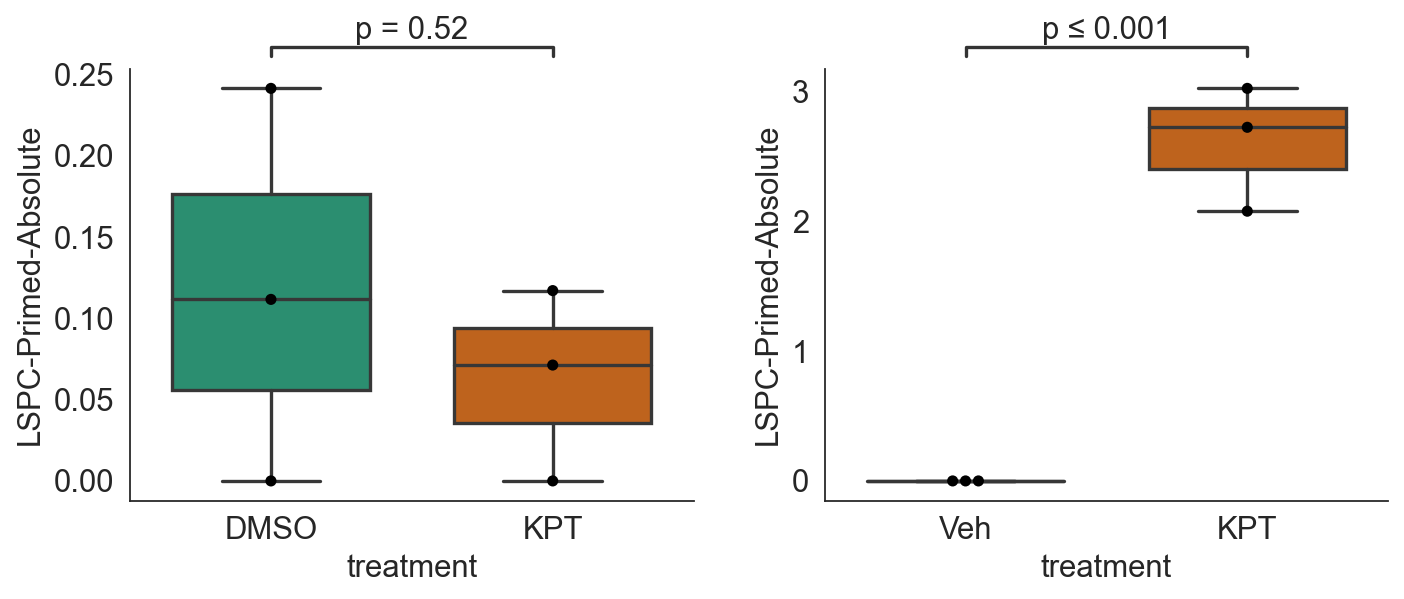

In [106]:
plt.figure(figsize=[9,4])
plt.subplot(1,2,1)
box_category(KPT330_invitro, 'treatment', 'LSPC-Primed-Absolute', order=['DMSO', 'KPT'], boxpairlist=[('DMSO', 'KPT')], textformat='simple')
plt.subplot(1,2,2)
box_category(KPT330_invivo, 'treatment', 'LSPC-Primed-Absolute', order=['Veh', 'KPT'], boxpairlist=[('Veh', 'KPT')], textformat='simple')
plt.tight_layout()

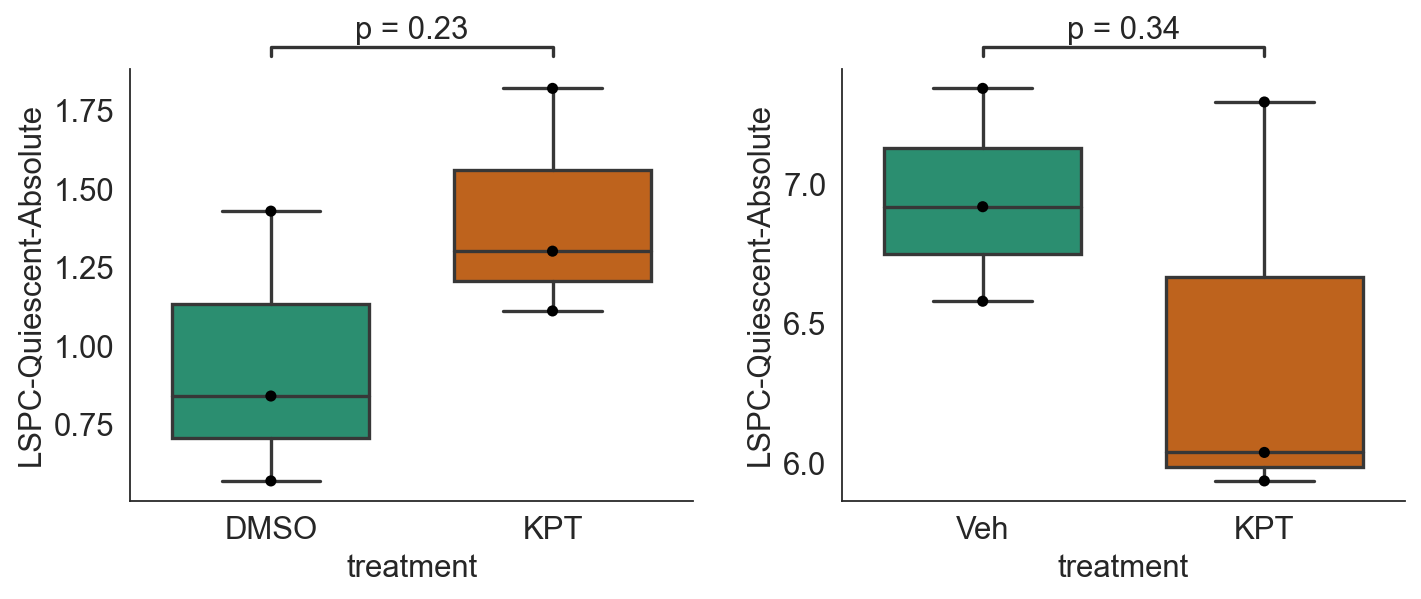

In [107]:
plt.figure(figsize=[9,4])
plt.subplot(1,2,1)
box_category(KPT330_invitro, 'treatment', 'LSPC-Quiescent-Absolute', order=['DMSO', 'KPT'], boxpairlist=[('DMSO', 'KPT')], textformat='simple')
plt.subplot(1,2,2)
box_category(KPT330_invivo, 'treatment', 'LSPC-Quiescent-Absolute', order=['Veh', 'KPT'], boxpairlist=[('Veh', 'KPT')], textformat='simple')
plt.tight_layout()

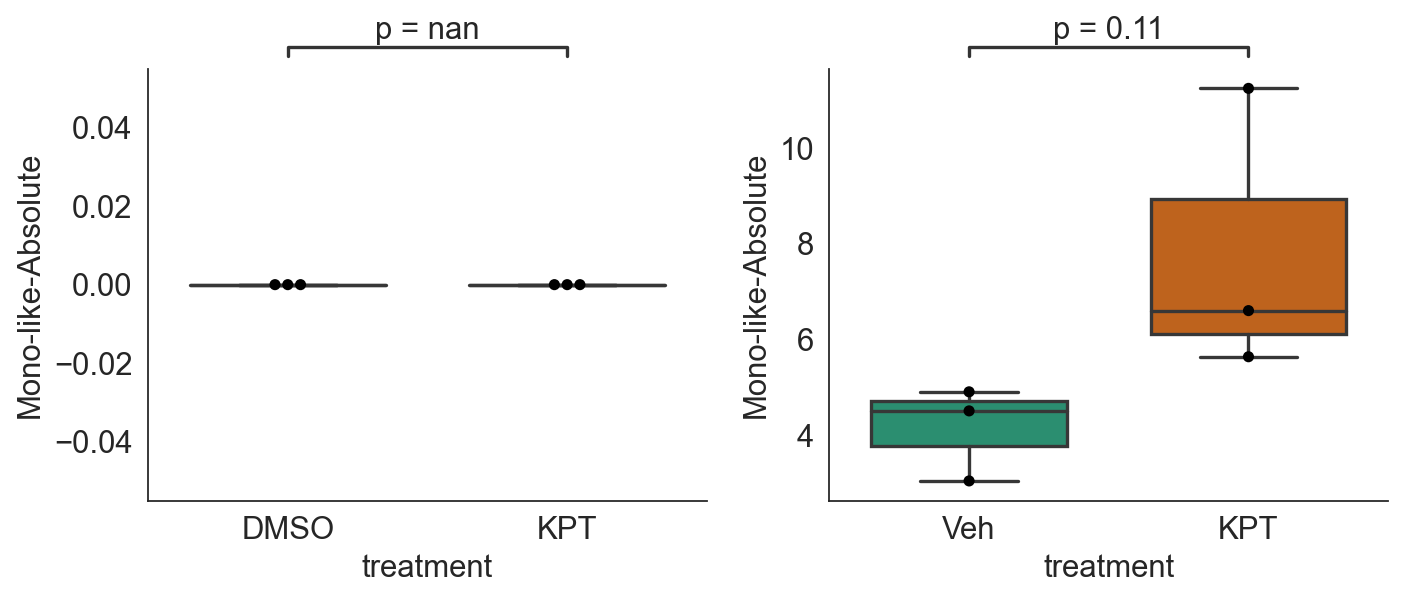

In [108]:
plt.figure(figsize=[9,4])
plt.subplot(1,2,1)
box_category(KPT330_invitro, 'treatment', 'Mono-like-Absolute', order=['DMSO', 'KPT'], boxpairlist=[('DMSO', 'KPT')], textformat='simple')
plt.subplot(1,2,2)
box_category(KPT330_invivo, 'treatment', 'Mono-like-Absolute', order=['Veh', 'KPT'], boxpairlist=[('Veh', 'KPT')], textformat='simple')
plt.tight_layout()

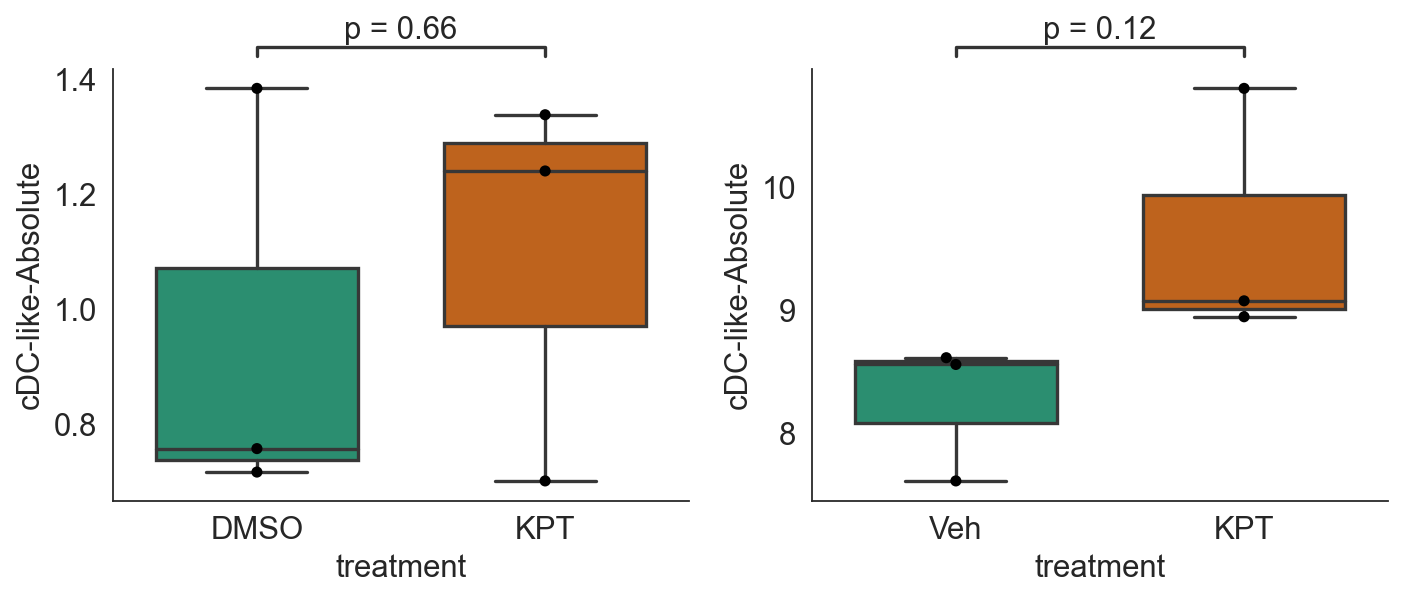

In [109]:
plt.figure(figsize=[9,4])
plt.subplot(1,2,1)
box_category(KPT330_invitro, 'treatment', 'cDC-like-Absolute', order=['DMSO', 'KPT'], boxpairlist=[('DMSO', 'KPT')], textformat='simple')
plt.subplot(1,2,2)
box_category(KPT330_invivo, 'treatment', 'cDC-like-Absolute', order=['Veh', 'KPT'], boxpairlist=[('Veh', 'KPT')], textformat='simple')
plt.tight_layout()

## Overlay Molecular data from scRNA-seq

In [159]:
# Load Malignant scRNA-seq
malignant = sc.read_h5ad("Data/scAML_malignant_newclust.h5ad")
# Re-order malignant cell types 
malignant.obs.Cluster = malignant.obs.Cluster.cat.set_categories(['LSPC-Quiescent', 'LSPC-Primed', 'LSPC-Cycle', 'GMP-like', 'ProMono-like', 'Mono-like', 'cDC-like'])
malignant

AnnData object with n_obs × n_vars = 11641 × 17466
    obs: 'NumberOfReads', 'AlignedToGenome', 'AlignedToTranscriptome', 'TranscriptomeUMIs', 'NumberOfGenes', 'CyclingScore', 'CyclingBinary', 'MutTranscripts', 'WtTranscripts', 'PredictionRF2', 'PredictionRefined', 'CellType', 'Score_HSC', 'Score_Prog', 'Score_GMP', 'Score_ProMono', 'Score_Mono', 'Score_cDC', 'Score_pDC', 'Score_earlyEry', 'Score_lateEry', 'Score_ProB', 'Score_B', 'Score_Plasma', 'Score_T', 'Score_CTL', 'Score_NK', 'NanoporeTranscripts', 'batch', 'is_cell_control', 'total_features_by_counts', 'log10_total_features_by_counts', 'total_counts', 'log10_total_counts', 'pct_counts_in_top_50_features', 'pct_counts_in_top_100_features', 'pct_counts_in_top_200_features', 'pct_counts_in_top_500_features', 'HALLMARK_TNFA_SIGNALING_VIA_NFKB', 'HALLMARK_HYPOXIA', 'HALLMARK_CHOLESTEROL_HOMEOSTASIS', 'HALLMARK_MITOTIC_SPINDLE', 'HALLMARK_WNT_BETA_CATENIN_SIGNALING', 'HALLMARK_TGF_BETA_SIGNALING', 'HALLMARK_IL6_JAK_STAT3_SIGNALING', '

/Users/andyzeng/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/andyzeng/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/andyzeng/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  Fut

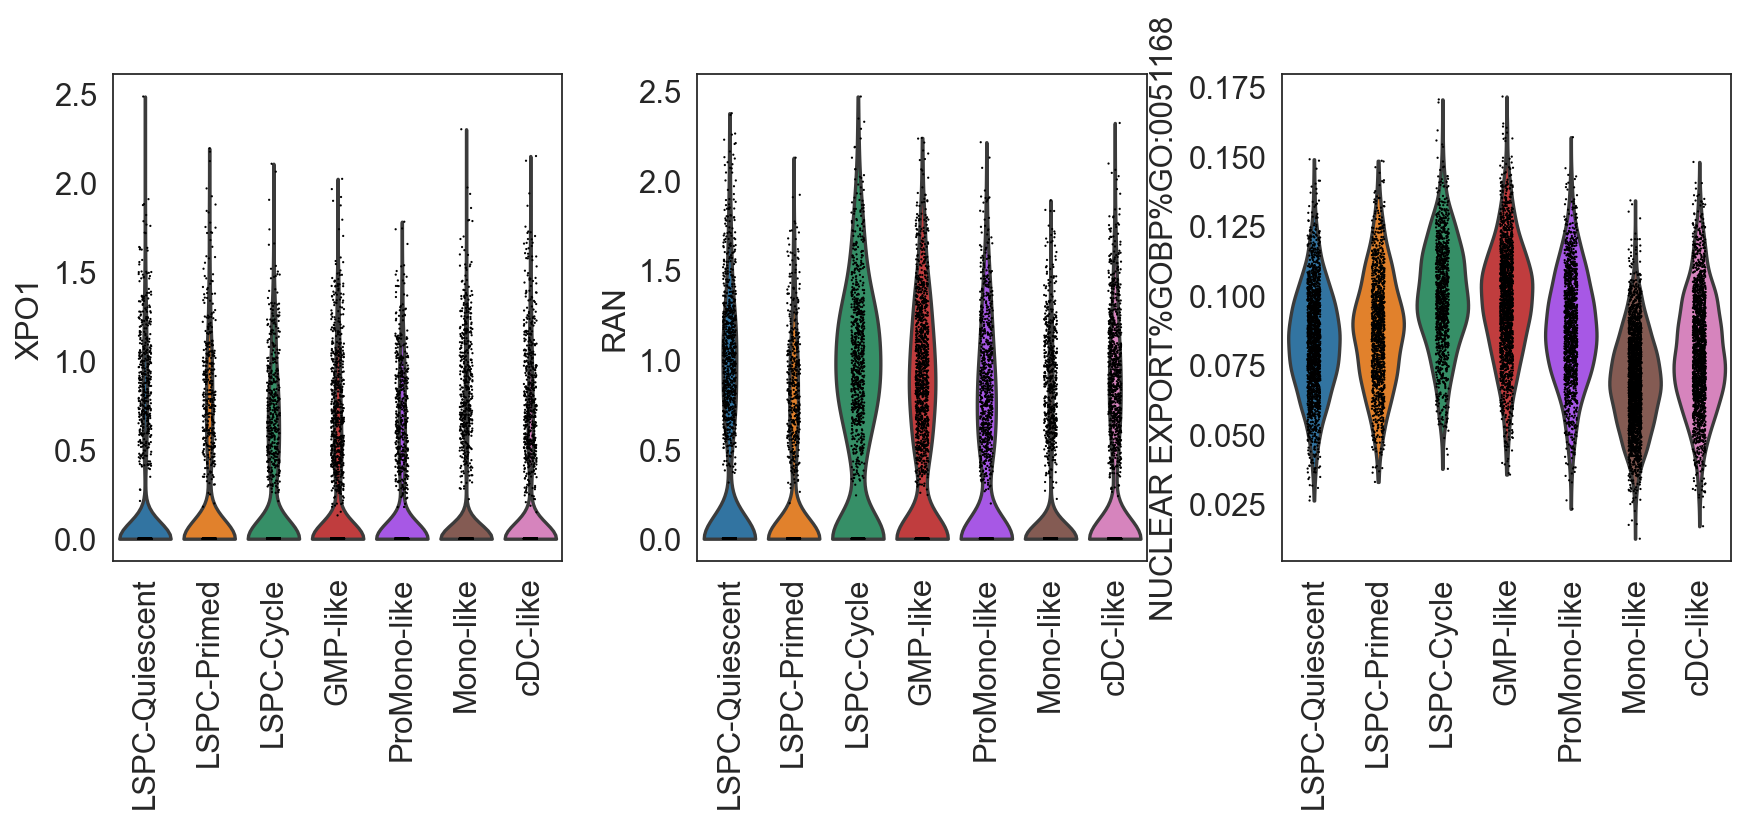

In [160]:
# Load Nuclear Export scores
malignant.obs = malignant.obs.join(pd.read_csv("Data/Fig5_Literature_DrugResponse/pvg_AML_nuclear_export_AUCell.csv").set_index('rowname'))
# Violin plot for XPO1 and related genes
sc.pl.violin(malignant, keys=['XPO1', 'RAN', 'NUCLEAR EXPORT%GOBP%GO:0051168'], groupby='Cluster', cmap='RdBu_r', rotation=90)

In [161]:
# Convert to obs
malignant.obs['XPO1'] = malignant[:,'XPO1'].X.toarray().flatten()
malignant.obs['RAN'] = malignant[:,'RAN'].X.toarray().flatten()
malignant.obs['Nuclear Export'] = malignant.obs['NUCLEAR EXPORT%GOBP%GO:0051168']
# New adata object to run matrixplot
dat = ad.AnnData(malignant_copy.obs[['XPO1', 'RAN', 'Nuclear Export']], obs=malignant_copy.obs[['batch', 'Cluster']])
sc.pp.scale(dat)
dat

/Users/andyzeng/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/Users/andyzeng/opt/anaconda3/lib/python3.7/site-packages/anndata/utils.py:141: UserWarning: X converted to numpy array with dtype float64
  warnings.warn(f"{name} converted to numpy array with dtype {arr.dtype}")


AnnData object with n_obs × n_vars = 11641 × 3
    obs: 'batch', 'Cluster'
    var: 'mean', 'std'

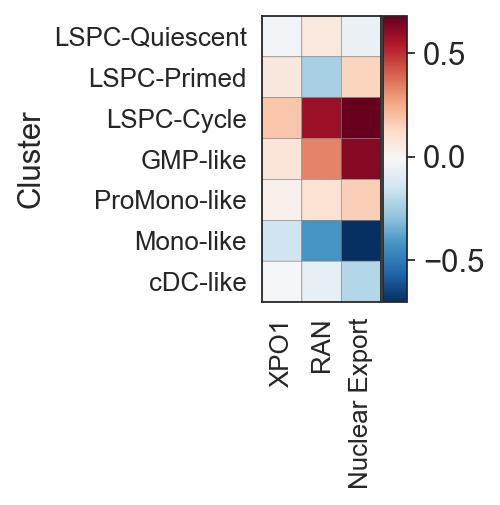

GridSpec(2, 3, height_ratios=[0, 10.5], width_ratios=[0.96, 0, 0.2])

In [162]:
sc.pl.matrixplot(dat, var_names=['XPO1', 'RAN', 'Nuclear Export'], groupby='Cluster', cmap='RdBu_r')